In [7]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://www.coingecko.com/zh-tw/%E5%8C%AF%E7%8E%87%E8%B5%B0%E5%8B%A2%E5%9C%96/%E4%BB%A5%E5%A4%AA%E5%B9%A3/btc')
soup = BeautifulSoup(res.text,'html.parser')


In [16]:
data_prices = soup.select('#coin_maxd_historical_price_chart_ta')[0].prettify('utf-8').decode('utf-8')

In [18]:
import re
m = re.search('<div data-prices="(.*?)"', data_prices)

In [22]:
import json
jd = json.loads(m.group(1))
#jd

In [25]:
import pandas
df = pandas.DataFrame(jd)
#df

In [27]:
df.columns = ['datetime','ETH']

In [30]:

df['datetime'] = pandas.to_datetime(df['datetime'],unit='ms')

In [32]:
df.head()

,datetime,ETH
0,2015-08-07,0.010141
1,2015-08-08,0.004954
2,2015-08-10,0.002609
3,2015-08-11,0.003955
4,2015-08-12,0.004694


In [34]:
df.index = df['datetime']

Populating the interactive namespace from numpy and matplotlib


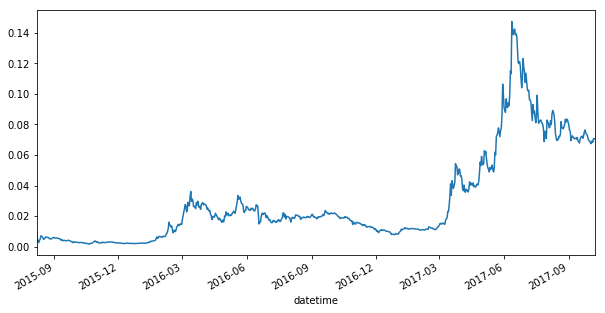

In [37]:
%pylab inline
df['ETH'].plot(kind = 'line',figsize = [10,5])

In [39]:
df['ma7'] = df['ETH'].rolling(window = 7).mean()

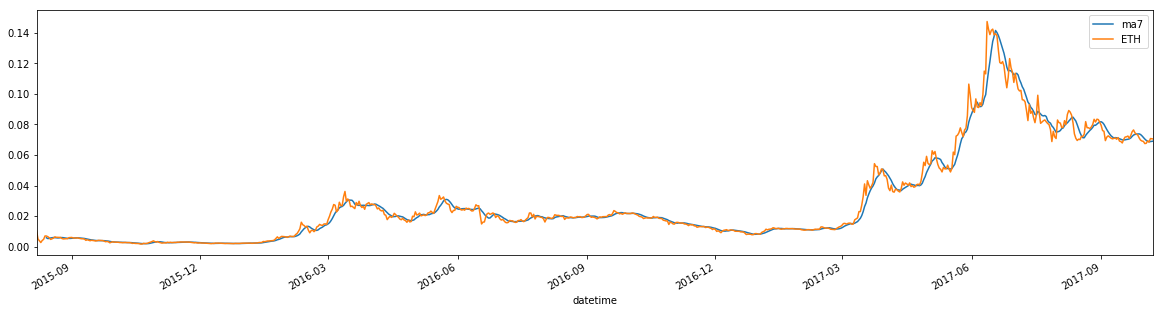

In [43]:
df[['ma7','ETH']].plot(kind = 'line', figsize=[20,5])

In [45]:
df2 = df[df['datetime'] >= '2017-01-01']

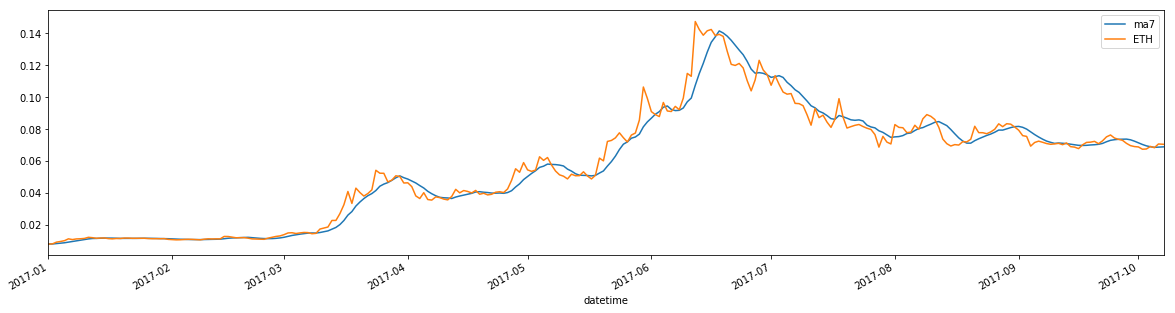

In [46]:
df2[['ma7','ETH']].plot(kind = 'line', figsize=[20,5])